In [ ]:
!pip install qiskit
!pip install qiskit_aer
!pip install pylatexenc

In [ ]:
from qiskit import QuantumCircuit, transpile, ClassicalRegister, QuantumRegister
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector, partial_trace
from qiskit.visualization import plot_bloch_multivector, plot_histogram
import numpy as np
import matplotlib.pyplot as plt

from qiskit_aer.noise import NoiseModel, depolarizing_error

Initial state of qubit 0:


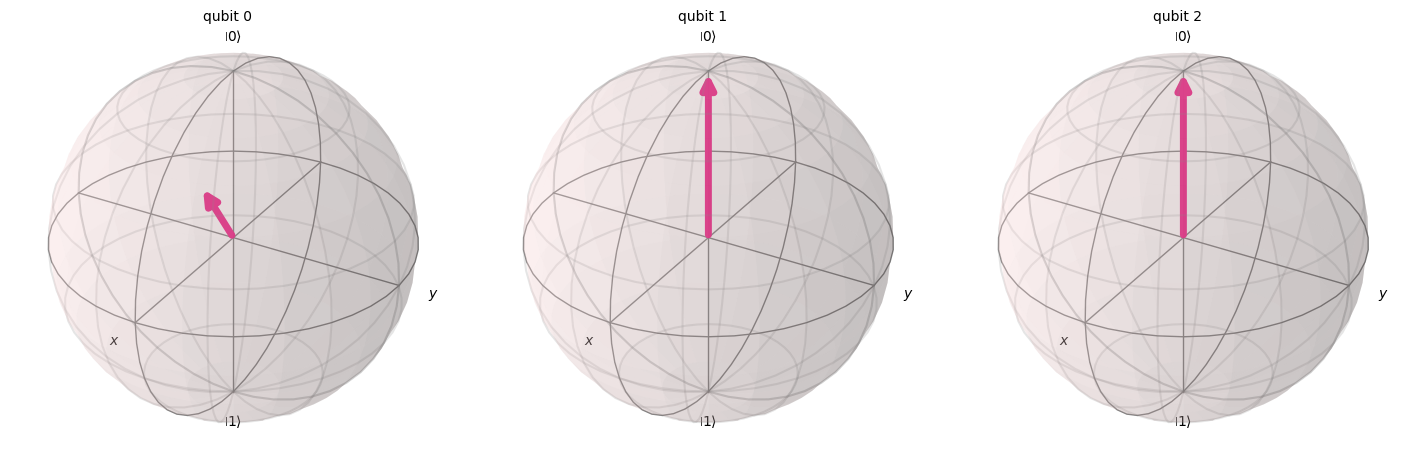

Fidelity between initial and teleported states: 1.000000

Bob’s final qubit (qubit 2) Bloch vector:


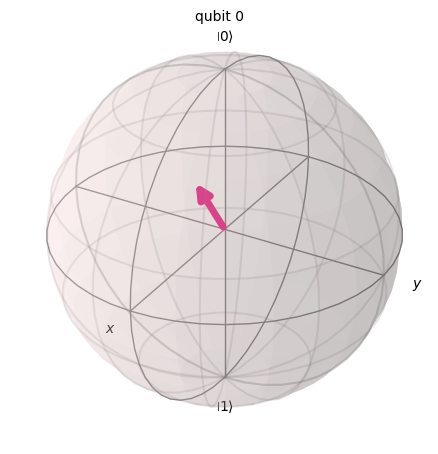

In [ ]:
# Quantum Teleportation (Coherent version) – Qiskit 2.x compatible
# Works on modern qiskit-aer simulators

# 1️⃣ Build the teleportation circuit
qc = QuantumCircuit(3)

# Prepare arbitrary state |ψ⟩ on qubit 0
theta, phi = 0.8, 0.3
qc.ry(theta, 0)
qc.rz(phi, 0)

# Save initial state for comparison
sv_initial = Statevector.from_instruction(qc)
print("Initial state of qubit 0:")
display(plot_bloch_multivector(sv_initial))

# Create Bell pair between qubits 1 and 2
qc.h(1)
qc.cx(1, 2)

# Bell measurement part (but coherent)
qc.cx(0, 1)
qc.h(0)

# Coherent corrections
qc.cx(1, 2)
qc.cz(0, 2)

# Save final statevector explicitly (Qiskit 2.x requires this)
qc.save_statevector()

# 2️⃣ Simulate
sim = AerSimulator()
compiled = transpile(qc, sim)
result = sim.run(compiled).result()

# Retrieve the saved statevector
sv_final = result.data(0)["statevector"]
sv_final = Statevector(sv_final)

# 3️⃣ Compare: initial vs Bob’s (qubit 2) final state
rho_bob = partial_trace(sv_final, [0, 1])
rho_init = partial_trace(sv_initial, [1, 2])

# Extract the dominant pure states (since both should be pure)
eigvals_b, eigvecs_b = np.linalg.eigh(rho_bob.data)
eigvals_i, eigvecs_i = np.linalg.eigh(rho_init.data)
bob_state = eigvecs_b[:, np.argmax(eigvals_b)]
init_state = eigvecs_i[:, np.argmax(eigvals_i)]

# Compute fidelity
fidelity = np.abs(np.vdot(init_state, bob_state)) ** 2
print(f"Fidelity between initial and teleported states: {fidelity:.6f}")

# 4️⃣ Visualize Bloch spheres (fixed)
print("\nBob’s final qubit (qubit 2) Bloch vector:")

# Convert rho_bob (DensityMatrix) → pure statevector (dominant eigenvector)
eigvals_b, eigvecs_b = np.linalg.eigh(rho_bob.data)
bob_state = eigvecs_b[:, np.argmax(eigvals_b)]  # dominant eigenvector
bob_sv = Statevector(bob_state)

display(plot_bloch_multivector(bob_sv))

Initial state of qubit 0 (theta=1.57, phi=0.00):


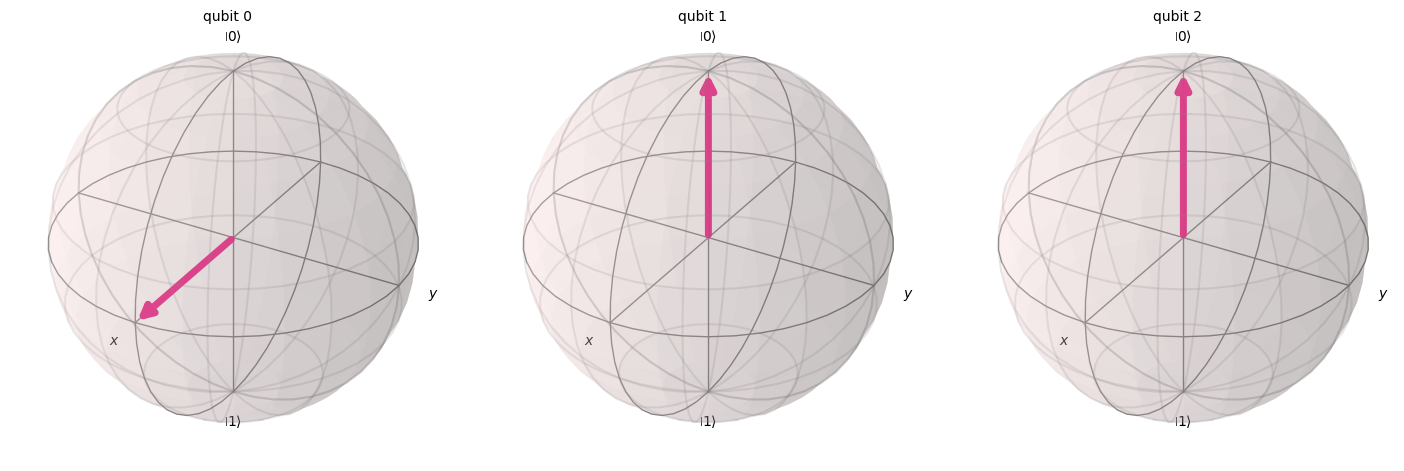

Fidelity between initial and teleported states: 1.000000

Bob’s final qubit (qubit 2) Bloch vector:


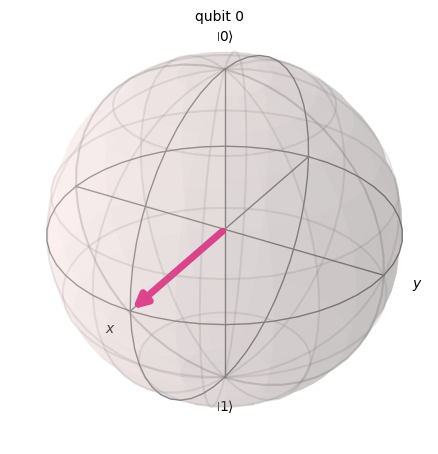

In [ ]:
"""
Task 1: Custom State Teleportation
Modify the input state preparation:

qc.ry(theta, 0)
qc.rz(phi, 0)
Experiment with different values of theta and phi (e.g., π/4, π/2, etc.) and visualize how the Bloch vector changes.
"""

# 1️⃣ Build the teleportation circuit
qc = QuantumCircuit(3)

# Prepare arbitrary state |ψ⟩ on qubit 0
theta, phi = np.pi/2, 0.0 
qc.ry(theta, 0)
qc.rz(phi, 0)

# Save initial state for comparison
sv_initial = Statevector.from_instruction(qc)
print(f"Initial state of qubit 0 (theta={theta:.2f}, phi={phi:.2f}):")
display(plot_bloch_multivector(sv_initial))

# Create Bell pair between qubits 1 and 2
qc.h(1)
qc.cx(1, 2)

# Bell measurement part (but coherent)
qc.cx(0, 1)
qc.h(0)

# Coherent corrections
qc.cx(1, 2)
qc.cz(0, 2)

# Save final statevector
qc.save_statevector()

# 2️⃣ Simulate
sim = AerSimulator()
compiled = transpile(qc, sim)
result = sim.run(compiled).result()

# Retrieve the saved statevector
sv_final = result.get_statevector()

# 3️⃣ Compare
rho_bob = partial_trace(sv_final, [0, 1])
rho_init = partial_trace(sv_initial, [1, 2])

eigvals_b, eigvecs_b = np.linalg.eigh(rho_bob.data)
eigvals_i, eigvecs_i = np.linalg.eigh(rho_init.data)
bob_state = eigvecs_b[:, np.argmax(eigvals_b)]
init_state = eigvecs_i[:, np.argmax(eigvals_i)]

fidelity = np.abs(np.vdot(init_state, bob_state)) ** 2
print(f"Fidelity between initial and teleported states: {fidelity:.6f}")

# 4️⃣ Visualize
print("\nBob’s final qubit (qubit 2) Bloch vector:")
bob_sv = Statevector(bob_state)
display(plot_bloch_multivector(bob_sv))

Initial state of qubit 0:


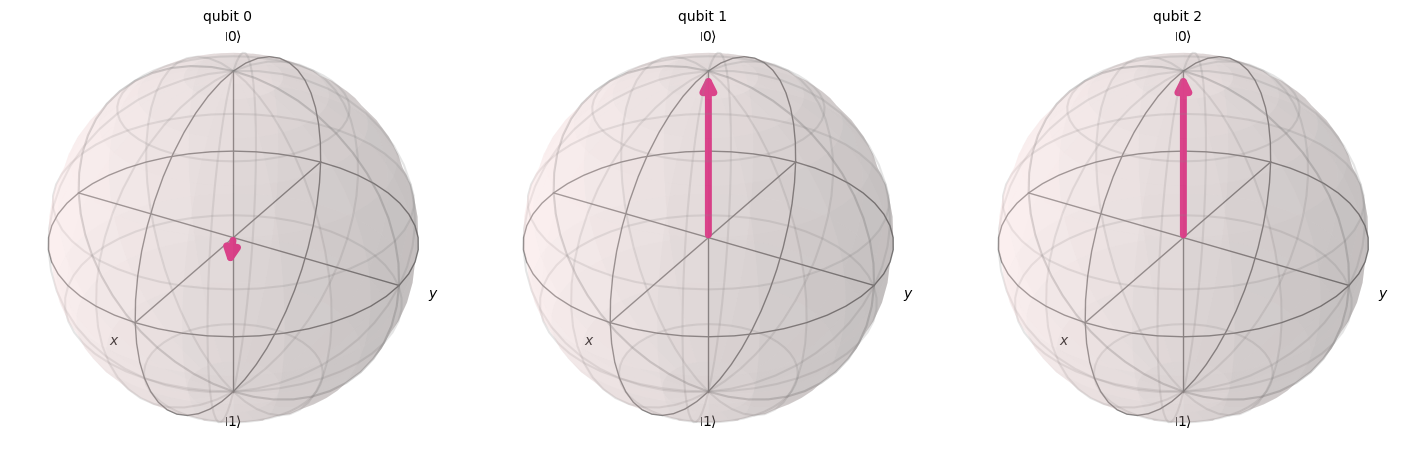

Fidelity after classical measurement: 1.000000

Bob’s final qubit (qubit 2) Bloch vector:


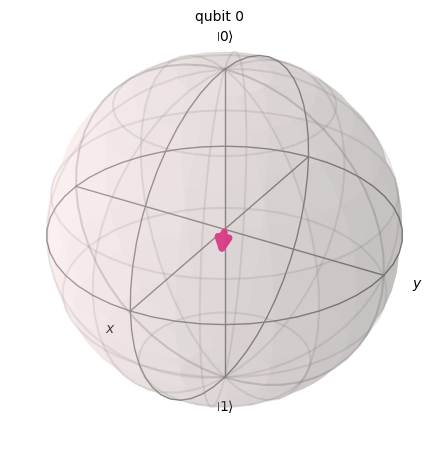

In [ ]:
"""
Task 2: Add Classical Measurement
Modify the code to include actual measurements of qubits 0 and 1, and then use conditional corrections with if_test() or .c_if() syntax.
"""

# Set up Registers
# 3 qubits
qr = QuantumRegister(3, name="q")
# 2 classical bits for Alice's measurement
c0 = ClassicalRegister(1, name="c0")
c1 = ClassicalRegister(1, name="c1")

qc = QuantumCircuit(qr, c0, c1)

# 1️⃣ State Preparation (Qubit 0)
theta, phi = 1.2, 0.5 # arbitrary state
qc.ry(theta, 0)
qc.rz(phi, 0)

# Save initial state
sv_initial = Statevector(qc)
print("Initial state of qubit 0:")
display(plot_bloch_multivector(sv_initial))

# 2️⃣ Entanglement (Qubits 1 & 2)
qc.h(1)
qc.cx(1, 2)

# 3️⃣ Bell Measurement (Alice measures 0 & 1)
qc.cx(0, 1)
qc.h(0)
qc.measure(0, c0) # Alice measures qubit 0 -> classical bit c0
qc.measure(1, c1) # Alice measures qubit 1 -> classical bit c1

# 4️⃣ Conditional Corrections (Bob applies to Qubit 2)
# If classical bit c1 is 1, apply X-gate to qubit 2
with qc.if_test((c1, 1)):
    qc.x(2)
# If classical bit c0 is 1, apply Z-gate to qubit 2
with qc.if_test((c0, 1)):
    qc.z(2)

# Simulation & Verification
qc.save_statevector() 

sim = AerSimulator()
# We must use 'transpile' for c_if gates to work
compiled = transpile(qc, sim)
result = sim.run(compiled, shots=1).result() # Only need 1 shot

# 5️⃣ Get Fidelity
sv_final = result.get_statevector()
# Trace out Alice's qubits (0, 1) to get Bob's state
rho_bob = partial_trace(sv_final, [0, 1]) 
rho_init = partial_trace(sv_initial, [1, 2])

# Fidelity calculation
eigvals_b, eigvecs_b = np.linalg.eigh(rho_bob.data)
eigvals_i, eigvecs_i = np.linalg.eigh(rho_init.data)
bob_state = eigvecs_b[:, np.argmax(eigvals_b)]
init_state = eigvecs_i[:, np.argmax(eigvals_i)]
fidelity = np.abs(np.vdot(init_state, bob_state)) ** 2
print(f"Fidelity after classical measurement: {fidelity:.6f}")

# 6️⃣ Visualize
print("\nBob’s final qubit (qubit 2) Bloch vector:")
bob_sv = Statevector(bob_state)
display(plot_bloch_multivector(bob_sv))

Running 20 teleportations with random initial states...
Fidelities for each run:
[np.float64(1.0), np.float64(1.0000000000000004), np.float64(1.0), np.float64(0.9999999999999998), np.float64(1.0000000000000009), np.float64(1.0), np.float64(0.9999999999999998), np.float64(1.0), np.float64(0.9999999999999998), np.float64(1.0), np.float64(1.0000000000000004), np.float64(1.0000000000000004), np.float64(1.0), np.float64(0.9999999999999996), np.float64(1.0000000000000004), np.float64(0.9999999999999996), np.float64(0.9999999999999998), np.float64(1.0), np.float64(0.9999999999999996), np.float64(1.0000000000000004)]


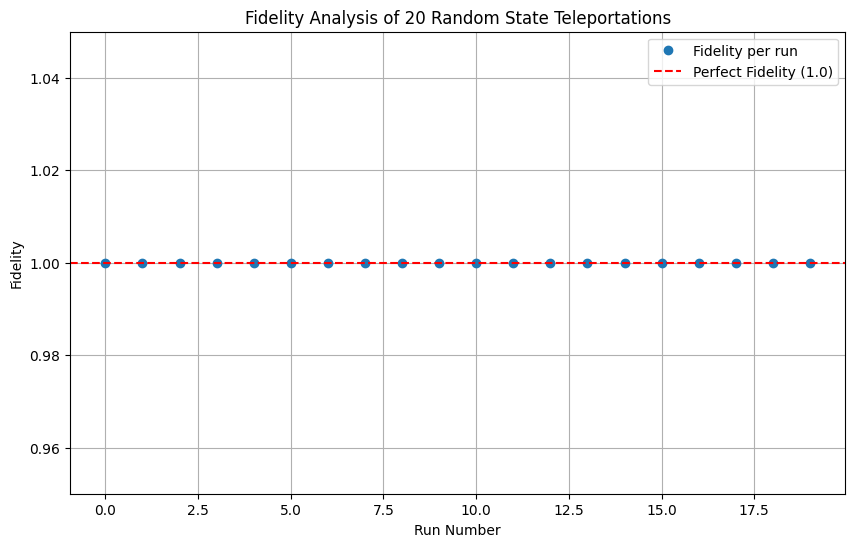


Average Fidelity: 1.000000


In [ ]:
"""
Task 3: Fidelity Analysis
Run teleportation for multiple random states (sample 10–20 different (theta, phi) pairs) and compute the average fidelity.
Plot fidelity values to show teleportation accuracy.
"""

# Builds, simulates, and returns the fidelity for one teleportation run with a given initial state
def run_teleportation(theta, phi, sim):
    # 1. Build Circuit
    qc = QuantumCircuit(3)
    qc.ry(theta, 0)
    qc.rz(phi, 0)
    
    # Get initial state
    sv_initial = Statevector(qc)
    
    qc.h(1)
    qc.cx(1, 2)
    qc.cx(0, 1)
    qc.h(0)
    qc.cx(1, 2)
    qc.cz(0, 2)
    qc.save_statevector()
    
    # 2. Simulate
    compiled = transpile(qc, sim)
    result = sim.run(compiled).result()
    sv_final = result.get_statevector()
    
    # 3. Get Fidelity
    rho_bob = partial_trace(sv_final, [0, 1])
    rho_init = partial_trace(sv_initial, [1, 2])
    
    eigvals_b, eigvecs_b = np.linalg.eigh(rho_bob.data)
    eigvals_i, eigvecs_i = np.linalg.eigh(rho_init.data)
    bob_state = eigvecs_b[:, np.argmax(eigvals_b)]
    init_state = eigvecs_i[:, np.argmax(eigvals_i)]
    
    fidelity = np.abs(np.vdot(init_state, bob_state)) ** 2
    return fidelity

sim = AerSimulator()
num_runs = 20
fidelities = []

print(f"Running {num_runs} teleportations with random initial states...")

for i in range(num_runs):
    # Generate random angles for the initial state
    rand_theta = np.random.uniform(0, np.pi)       # 0 to 180 degrees
    rand_phi = np.random.uniform(0, 2 * np.pi)     # 0 to 360 degrees
    
    # Run the experiment and store the fidelity
    fid = run_teleportation(rand_theta, rand_phi, sim)
    fidelities.append(fid)

print("Fidelities for each run:")
print(fidelities)

plt.figure(figsize=(10, 6))
plt.plot(fidelities, 'o', label='Fidelity per run')
plt.axhline(y=1.0, color='r', linestyle='--', label='Perfect Fidelity (1.0)')
plt.ylim(0.95, 1.05)
plt.xlabel("Run Number")
plt.ylabel("Fidelity")
plt.title("Fidelity Analysis of 20 Random State Teleportations")
plt.legend()
plt.grid(True)
plt.show()

avg_fidelity = np.mean(fidelities)
print(f"\nAverage Fidelity: {avg_fidelity:.6f}")

--- Step 1: Initial State (Q0 = |ψ⟩, Q1/Q2 = |0⟩) ---


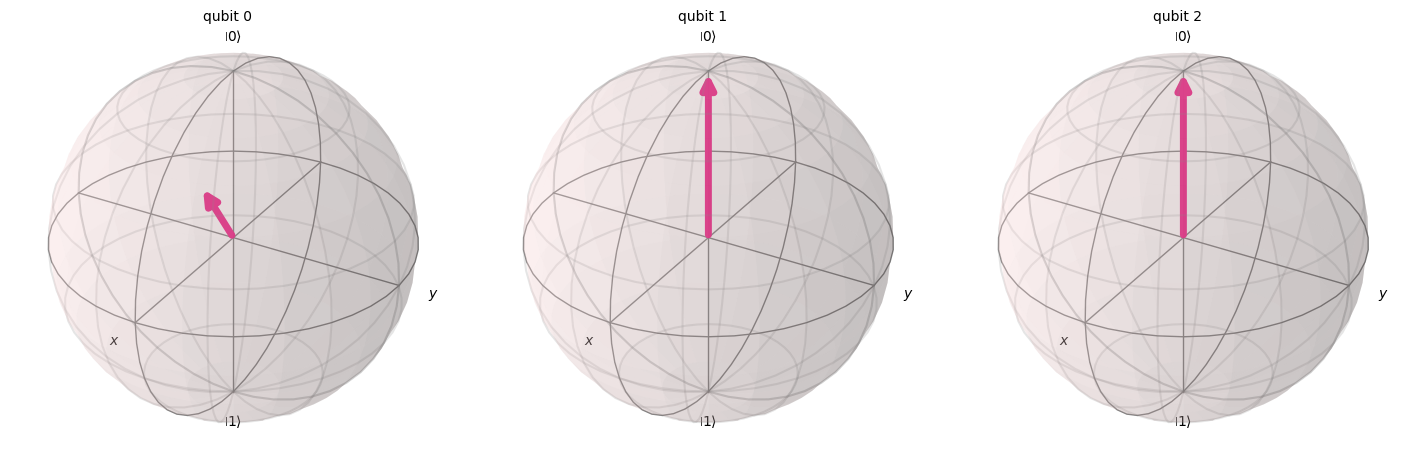


--- Step 2: After Entanglement (Q1 & Q2 are now linked) ---


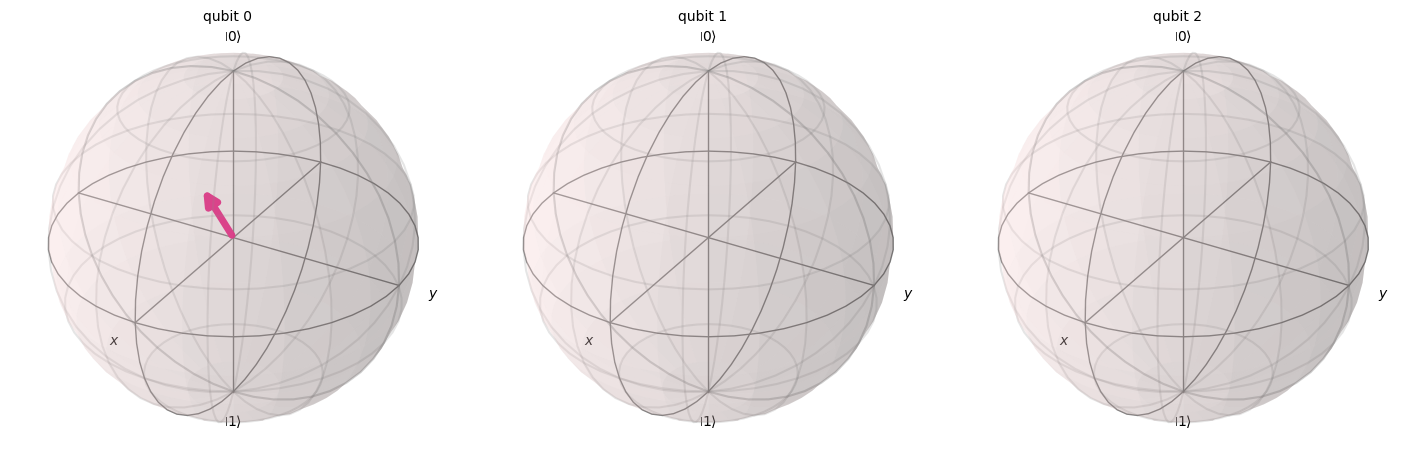


--- Step 3: After Bell Measurement (State is 'scrambled' across all 3) ---


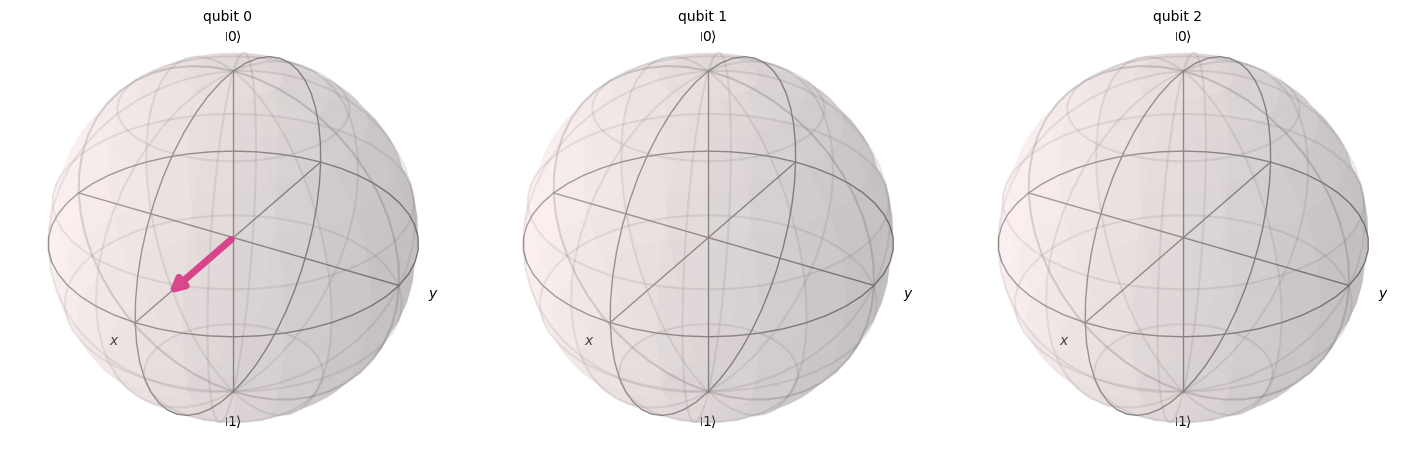


--- Step 4: After Corrections (Q2 is now |ψ⟩) ---


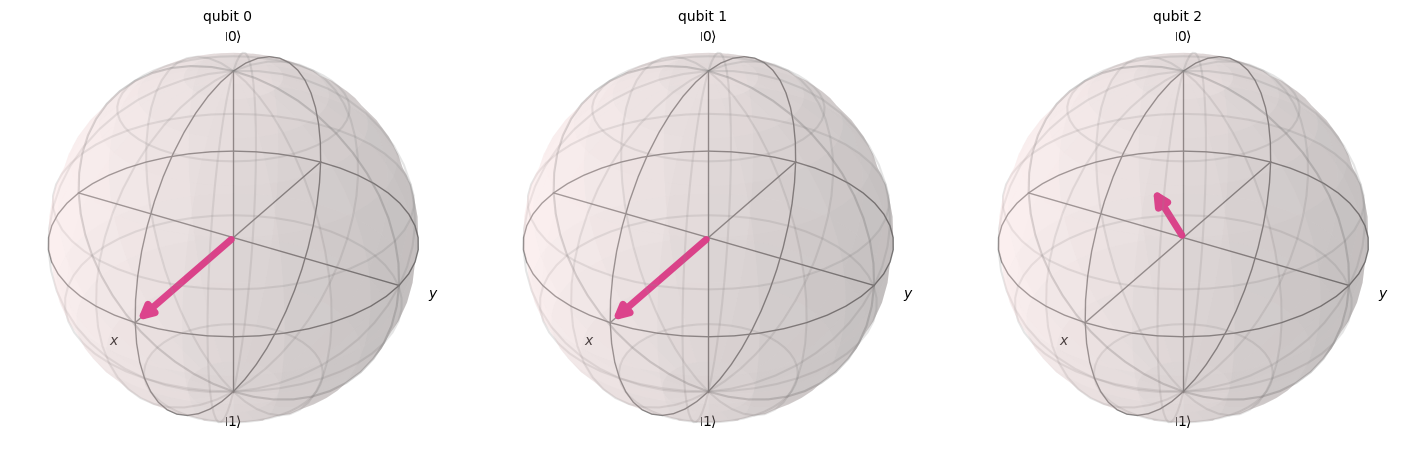

In [ ]:
"""
Task 4: Step-by-Step Visualization
Insert Bloch sphere visualizations after each major operation (H, CX, CZ) to create an animation showing how the quantum state “moves” across qubits.
"""

# --- Step 1: Initial State ---
qc_step1 = QuantumCircuit(3)
theta, phi = 0.8, 0.3
qc_step1.ry(theta, 0)
qc_step1.rz(phi, 0)

sv1 = Statevector(qc_step1)
print("--- Step 1: Initial State (Q0 = |ψ⟩, Q1/Q2 = |0⟩) ---")
display(plot_bloch_multivector(sv1))


# --- Step 2: Entanglement Creation ---
qc_step2 = QuantumCircuit(3)
qc_step2.ry(theta, 0)
qc_step2.rz(phi, 0)
# Add Bell Pair
qc_step2.h(1)
qc_step2.cx(1, 2)

sv2 = Statevector(qc_step2)
print("\n--- Step 2: After Entanglement (Q1 & Q2 are now linked) ---")
display(plot_bloch_multivector(sv2))


# --- Step 3: Bell Measurement (Coherent) ---
qc_step3 = QuantumCircuit(3)
qc_step3.ry(theta, 0)
qc_step3.rz(phi, 0)
qc_step3.h(1)
qc_step3.cx(1, 2)
# Add Bell Measurement gates
qc_step3.cx(0, 1)
qc_step3.h(0)

sv3 = Statevector(qc_step3)
print("\n--- Step 3: After Bell Measurement (State is 'scrambled' across all 3) ---")
display(plot_bloch_multivector(sv3))


# --- Step 4: Coherent Corrections (Final State) ---
qc_step4 = QuantumCircuit(3)
qc_step4.ry(theta, 0)
qc_step4.rz(phi, 0)
qc_step4.h(1)
qc_step4.cx(1, 2)
qc_step4.cx(0, 1)
qc_step4.h(0)
# Add Correction gates
qc_step4.cx(1, 2)
qc_step4.cz(0, 2)

sv4 = Statevector(qc_step4)
print("\n--- Step 4: After Corrections (Q2 is now |ψ⟩) ---")
display(plot_bloch_multivector(sv4))

Created a noise model with 1% single-qubit error and 5% CNOT error.
Running 20 NOISY teleportations...
Noisy fidelities for each run:
[np.float64(0.9999999999999998), np.float64(1.0), np.float64(1.0), np.float64(0.9999999999999998), np.float64(0.2707550057329661), np.float64(1.0), np.float64(1.0), np.float64(0.0662809135558924), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0000000000000004), np.float64(1.0), np.float64(1.0), np.float64(3.274080905458301e-33), np.float64(1.0000000000000004), np.float64(1.0000000000000004), np.float64(1.0), np.float64(0.10956732159477811), np.float64(0.6326788989986114)]


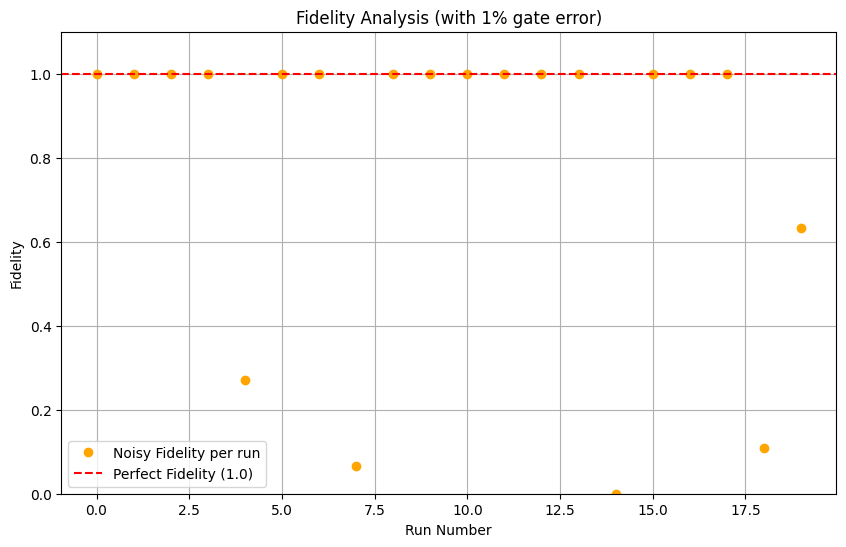


Average Noisy Fidelity: 0.803964


In [ ]:
"""
Task 5: Introduce Noise
Use AerSimulator(noise_model=...) to add a small depolarizing or amplitude damping noise model.
Study how teleportation fidelity decreases under noisy conditions.
"""

noise_model = NoiseModel()

# Add a 1% depolarizing error to all single-qubit gates (ry, rz, h)
error_1 = depolarizing_error(0.01, 1) 
# Add a 5% error to two-qubit CNOT (cx) gates
error_2 = depolarizing_error(0.05, 2) 

noise_model.add_all_qubit_quantum_error(error_1, ['ry', 'rz', 'h'])
noise_model.add_all_qubit_quantum_error(error_2, ['cx', 'cz'])

print("Created a noise model with 1% single-qubit error and 5% CNOT error.")

# Create a new simulator with this noise model
sim_noise = AerSimulator(noise_model=noise_model)

num_runs = 20
fidelities_noisy = []

print(f"Running {num_runs} NOISY teleportations...")

for i in range(num_runs):
    rand_theta = np.random.uniform(0, np.pi)
    rand_phi = np.random.uniform(0, 2 * np.pi)
    
    # Run the experiment on the NOISY simulator
    fid = run_teleportation(rand_theta, rand_phi, sim_noise)
    fidelities_noisy.append(fid)

print("Noisy fidelities for each run:")
print(fidelities_noisy)

plt.figure(figsize=(10, 6))
plt.plot(fidelities_noisy, 'o', color='orange', label='Noisy Fidelity per run')
plt.axhline(y=1.0, color='r', linestyle='--', label='Perfect Fidelity (1.0)')
plt.ylim(0.0, 1.1)
plt.xlabel("Run Number")
plt.ylabel("Fidelity")
plt.title("Fidelity Analysis (with 1% gate error)")
plt.legend()
plt.grid(True)
plt.show()

avg_fidelity_noisy = np.mean(fidelities_noisy)
print(f"\nAverage Noisy Fidelity: {avg_fidelity_noisy:.6f}")